In [1]:
from math import sqrt,cos,sin,pi,log
import numpy as np
import matplotlib.pylab as plt

In [2]:
taper = 0.8
S = 200  #sq ft


In [3]:
#IMPORT SOME OF THE VALUES HERE
initialWeight = 3379
finalWeight = 2910
altitude = 10000 #ft
rhoSL = 0.002378
averageWeight = (initialWeight+finalWeight)/2
cbhp = 0.4586
propEff = 0.85
cruiseSpeed =293.7
Range = 3937008 #ft
cdMin = 0.02541
endurance = 5.172 #hours
### check spelling from previous modules
LDmax = 13.41


class aspectRatio:
    def __init__ (self,initialWeight,finalWeight,altitude,cruiseSpeed,S):
        self.initialWeight = initialWeight
        self.finalWeight = finalWeight
        self.altitude =altitude
        self.cruiseSpeed = cruiseSpeed
        self.S = S
        
    def altitudeDensity(self):
        ### fetch this function in other script
        altitudeDensity = rhoSL*(1-0.0000068756*self.altitude)**4.2561
        return altitudeDensity
    
    def cruiseCL (self):
        #### make a function to calculate cl
        cruiseCL = (2* averageWeight) / (aspectRatio.altitudeDensity(self)*self.S* self.cruiseSpeed**2)
        return cruiseCL
    
    def ct (self):
        ct = (cbhp * self.cruiseSpeed) / (1980000 * propEff)
        return ct
    
    def rangeAR (self):
        ###include range in the init function
        rangeAR = ((aspectRatio.cruiseCL(self))**2 ) / (pi*(( (self.cruiseSpeed*aspectRatio.cruiseCL(self)* log(self.initialWeight/self.finalWeight))/(Range * aspectRatio.ct(self))) - cdMin) )     
        return rangeAR
    
    def enduranceAR(self):
        enduranceAR = ((aspectRatio.cruiseCL(self))**2 ) / (pi*(( (aspectRatio.cruiseCL(self)* log(self.initialWeight/self.finalWeight))/(endurance*3600 * aspectRatio.ct(self))) - cdMin) )     
        return enduranceAR
    
    ## put some if-else statements for the sailplane category and remember to check the automatic AR<36 rule
    
    def unPoweredSailplaneAR(self):
        unPoweredSailplaneAR = 44.482 - sqrt(1672.2-28.41*LDmax)
        return unPoweredSailplaneAR
    
    def poweredSailplaneAR(self):
        poweredSailplaneAR = (LDmax + 0.443)/1.7405
        return poweredSailplaneAR
    
        

    
wing = aspectRatio(initialWeight,finalWeight,altitude,cruiseSpeed,S)

print(wing.altitudeDensity(),"Altitude Density")
print(wing.cruiseCL(),"Cruise CL")
print (wing.ct(),"ct")
print (wing.rangeAR(),"Range AR")
print (wing.enduranceAR(),"Endurance AR")
print ('For Sailplanes')
print (wing.unPoweredSailplaneAR(),"unpowered Sailplane AR")
print (wing.poweredSailplaneAR(),"powered Sailplane AR")

0.0017560745944146475 Altitude Density
0.2075872836881338 Cruise CL
8.003019607843137e-05 ct
3.9142575497301757 Range AR
-2.9863244743628394 Endurance AR
For Sailplanes
8.548423779423231 unpowered Sailplane AR
7.959207124389543 powered Sailplane AR


In [4]:
class wingDimensions:
    
    def __init__ (self, S , AR, taper):        
        self.AR = AR
        self.S = S
        self.taper = taper
        
    def wingSpan (self):
        wingspan = sqrt (self.AR *self.S) 
        return wingspan
    
    def Cavg (self):
        Cavg = wingDimensions.wingSpan(self)/self.AR
        return Cavg
    
    def rootChord(self):
        rootChord = 2* wingDimensions.Cavg(self)/ (1+self.taper)
        return rootChord
    
    def tipChord (self):
        tipChord = self.taper*wingDimensions.rootChord(self)
        return tipChord
    
    def meanGeometricChord (self):
        meanGeometricChord = (2/3)*(wingDimensions.rootChord(self))*((1+self.taper+self.taper**2)/(1+self.taper))
        return meanGeometricChord
    
    def chordAtY (self,y):
        chordAtY = wingDimensions.rootChord(self)*(1+(2*(self.taper - 1)*y/wingDimensions.wingSpan(self)))
        return chordAtY
    
    def yMGC (self):
        yMGC = (wingDimensions.wingSpan(self)/6)*((1+2*self.taper)/(1+self.taper))
        return yMGC
    
wing1 = wingDimensions(S,wing.rangeAR(),taper)

print (wing1.wingSpan(),"wingspan")
print (wing1.Cavg(),"average chord")
print (wing1.rootChord(),"root chord")
print (wing1.tipChord(),"tip chord") 
print (wing1.meanGeometricChord(),"MGC") 
print (wing1.chordAtY(10),"chord at Y")   #CHANGE 10 LATER TO INPUT
print (wing1.yMGC(),"Y Location of MGC")

27.97948373265731 wingspan
7.148094722225429 average chord
7.942327469139365 root chord
6.353861975311492 tip chord
7.177510749888909 MGC
6.806877287852543 chord at Y
6.735801639343427 Y Location of MGC


In [5]:
### Gudmundsson says that taper ratio is the second most important geometric properties of the wing

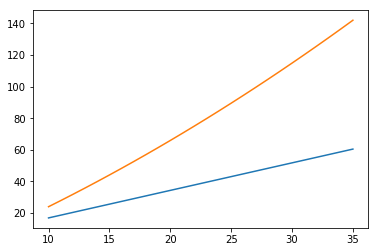

In [6]:
## LDmax as a funtion of taper ratio
ARrange = np.arange(10,36)
ldmaxPowered = 1.7405*ARrange - 0.443
ldmaxunpowered = 0.0352*ARrange**2 + 3.1315*ARrange - 10.787

plt.plot(ARrange,ldmaxPowered)
plt.plot(ARrange,ldmaxunpowered)
plt.show()

In [7]:
#IMPORT ALL THESE JUNK SOMETIMES LATER... AND JEEZ ORGANIZE THE DAMN CODE
clalfa = 6.1
alfazero = -3.2
finalMTOW = 3600

In [8]:
AOA = 5 #Degrees


angularStation = np.array([22.5,45.0,67.5,90.0])/57.296
CosangularStation = np.cos (angularStation)
cTheta = wing1.tipChord()*CosangularStation + ( wing1.rootChord()*(1-CosangularStation)) 
SinangularStation = np.sin(angularStation)
SinangularStation3 = np.sin(angularStation*3)
SinangularStation5 = np.sin(angularStation*5)
SinangularStation7 = np.sin(angularStation*7)
angularMu = cTheta*clalfa/(4*wing1.wingSpan())                 

In [9]:
print (angularStation)
print (CosangularStation)
print (cTheta)
print(SinangularStation)
print(SinangularStation3)
print(SinangularStation5)
print(SinangularStation7)
print (angularMu)

[ 0.39269757  0.78539514  1.17809271  1.57079028]
[  9.23880111e-01   7.07108918e-01   3.82687621e-01   6.04475077e-06]
[ 6.47477579  6.81910935  7.33444139  7.94231787]
[ 0.38268204  0.70710464  0.9238778   1.        ]
[ 0.9238778   0.70711319 -0.38267087 -1.        ]
[ 0.92388242 -0.7070961  -0.38270437  1.        ]
[ 0.38269321 -0.70712174  0.92389168 -1.        ]
[ 0.35290262  0.37167025  0.39975802  0.43288986]


In [10]:
A11 = SinangularStation*(angularMu + SinangularStation)
A12 = SinangularStation3*(3*angularMu + SinangularStation)
A13 = SinangularStation5*(5*angularMu + SinangularStation)
A14 = SinangularStation7*(7*angularMu + SinangularStation)
A = np.array([A11,A12,A13,A14])
Afinal = A.transpose()

B1 = angularMu*(AOA/57.296 - alfazero/57.296)*SinangularStation
Bfinal = B1.reshape(4,1)

In [11]:
#c = Afinal**-1   # THIS METHOD DOESNT WORK FOR MATRIX INVERSE...SH*T AINT LIKE MATLAB HAHA 1 HOUR WASTED
c = np.linalg.inv(Afinal)
d = np.dot(c,Bfinal)
d0 = d[0]

In [12]:
cl = np.pi*wing.rangeAR()*d0  
print (cl)

[ 0.56879747]


In [13]:
dFactor = 3*(d[1]/d[0])**2 + (5*(d[2]/d[0])**2) + (7*(d[3]/d[0])**2)

In [14]:
CDi = cl**2*(1+dFactor)/(np.pi*wing.rangeAR())   

In [15]:
oswaldeff = 1/(1+dFactor)
print(oswaldeff)

[ 0.98325587]


In [16]:
CLalfa = cl/((AOA/57.296) - (alfazero/57.296))
print (CLalfa , "per radian")

[ 3.9743683] per radian


In [17]:
vel = sqrt ((2*finalMTOW)/(rhoSL*S*cl)) 
print (vel,"ft/s")

163.1422681484366 ft/s


In [18]:
#Accounting for the fuselage
fuselageWidth = 4.167 #ft
reducedWingspan = wing1.wingSpan() - fuselageWidth
reducedS = S - (wing1.rootChord()*fuselageWidth)
reducedAR = (reducedWingspan**2)/reducedS
reducedRootChord= (wing1.rootChord()*(1-(fuselageWidth/wing1.wingSpan())) )+(wing1.tipChord()*(fuselageWidth/wing1.wingSpan()))
reducedTaper = (wing1.wingSpan()*wing1.rootChord())/(wing1.rootChord()*(wing1.wingSpan()-fuselageWidth)+(fuselageWidth*wing1.rootChord()))


print ("CL of the reduced Wing")
reducedCL = ((2*finalMTOW)/(rhoSL*vel**2*reducedS)) #it actually increased. The name reducedCl is just for formality
print(reducedCL,"CL due to reduced Wing")
print(reducedWingspan,"ft, reduced wingspan")
print(reducedS,"ft^2, reduced Wing Area")
print(reducedAR,"reduced AR" )
print(reducedRootChord,"reduced Root Chord" )
print(reducedTaper,"reduced Taper" )

CL of the reduced Wing
0.6815850763771479 CL due to reduced Wing
23.812483732657313 ft, reduced wingspan
166.90432143609627 ft^2, reduced Wing Area
3.3973618935635126 reduced AR
7.705756423868256 reduced Root Chord
0.9999999999999999 reduced Taper
